In this Guide,
- We generate a random sampled data for A/B Testing
- We conduct a Hypothese which is "There is no significant difference between Control and New shop icon Test"
- We use z-test and bayesian a/b testing techniques for explain results to more efficiently
 

In [1]:
#A/B Test Data Generator
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random

# Seed for reproducibility
random.seed(42)
np.random.seed(42)

statistics = {
    'icon_shop_opens': {'mean': 0.15, 'std': 0.58},
    'inter_shop_opens': {'mean': 0.12, 'std': 0.51},
    'icon_cash_purchases': {'mean': 0.04, 'std': 0.37},
    'inter_cash_purchases': {'mean': 0.09, 'std': 0.76},
    'icon_revenue_usd': {'mean': 0.17, 'std': 1.56},
    'inter_revenue_usd': {'mean': 0.21, 'std': 1.77},
    'session_length': {'mean': 32.69, 'std': 15.04},
    'rvs_watched': {'mean': 14.75, 'std': 5.81},
    'levels_played': {'mean': 13.48, 'std': 8.75},
    'cohort_day': {'mean': 3.14, 'std': 2.52}
}

# Generate user_id
user_ids = [f"user_{i}" for i in range(1, 50001)]

# Generate platform data
platforms = np.random.choice(['Android', 'iOS'], size=50000)

# Generate variant data
variants = np.random.choice(['Control', 'New Shop Icon'], size=50000)


# Generate install_timestamp
start_date = datetime(2022, 1, 1)
end_date = datetime(2023, 1, 1)

install_timestamps = [start_date + (end_date - start_date) * random.random() for _ in range(50000)]


# Generate country_type
country_types = np.random.choice(['US', 'Non-US'], size=50000)

# Generate session_timestamp (some might be None to simulate nulls)
session_timestamps = [timestamp + timedelta(days=random.randint(1, 30)) if random.random() > 0.005 else None for timestamp in install_timestamps]

# Generate numerical data
"""
icon_shop_opens = np.random.randint(0, 50, size=50000)
inter_shop_opens = np.random.randint(0, 50, size=50000)
icon_cash_purchases = np.random.randint(0, 20, size=50000)
inter_cash_purchases = np.random.randint(0, 20, size=50000)
icon_revenue_usd = np.random.randint(0, 1000, size=50000)
inter_revenue_usd = np.random.randint(0, 1000, size=50000)
session_length = np.random.randint(0, 3600, size=50000)  # in seconds
rvs_watched = np.random.randint(0, 100, size=50000)
levels_played = np.random.randint(0, 100, size=50000)
"""
icon_shop_opens = np.round(np.random.normal(statistics['icon_shop_opens']['mean'], statistics['icon_shop_opens']['std'], 50000)).astype(int)
inter_shop_opens = np.round(np.random.normal(statistics['inter_shop_opens']['mean'], statistics['inter_shop_opens']['std'], 50000)).astype(int)
icon_cash_purchases = np.round(np.random.normal(statistics['icon_cash_purchases']['mean'], statistics['icon_cash_purchases']['std'], 50000)).astype(int)
inter_cash_purchases = np.round(np.random.normal(statistics['inter_cash_purchases']['mean'], statistics['inter_cash_purchases']['std'], 50000)).astype(int)
icon_revenue_usd = np.round(np.random.normal(statistics['icon_revenue_usd']['mean'], statistics['icon_revenue_usd']['std'], 50000)).astype(int)
inter_revenue_usd = np.round(np.random.normal(statistics['inter_revenue_usd']['mean'], statistics['inter_revenue_usd']['std'], 50000)).astype(int)
session_length = np.round(np.random.normal(statistics['session_length']['mean'], statistics['session_length']['std'], 50000)).astype(int)  # in seconds
rvs_watched = np.round(np.random.normal(statistics['rvs_watched']['mean'], statistics['rvs_watched']['std'], 50000)).astype(int)
levels_played = np.round(np.random.normal(statistics['levels_played']['mean'], statistics['levels_played']['std'], 50000)).astype(int)

# Create DataFrame
data = pd.DataFrame({
    'user_id': user_ids,
    'platform': platforms,
    'variant': variants,
    'install_timestamp': install_timestamps,
    'country_type': country_types,
    'session_timestamp': session_timestamps,
    'icon_shop_opens': icon_shop_opens,
    'inter_shop_opens': inter_shop_opens,
    'icon_cash_purchases': icon_cash_purchases,
    'inter_cash_purchases': inter_cash_purchases,
    'icon_revenue_usd': icon_revenue_usd,
    'inter_revenue_usd': inter_revenue_usd,
    'session_length': session_length,
    'rvs_watched': rvs_watched,
    'levels_played': levels_played,
})
column_lst = ['icon_shop_opens',
    'inter_shop_opens',
    'icon_cash_purchases',
    'inter_cash_purchases',
    'icon_revenue_usd',
    'inter_revenue_usd',
    'session_length',
    'rvs_watched',
    'levels_played']

for column in column_lst:
    data[column] = data[column].apply(lambda x: abs(x))

# Convert timestamps to strings
data['install_timestamp'] = data['install_timestamp'].astype(str)
data['session_timestamp'] = data['session_timestamp'].astype(str)

data.head()

,user_id,platform,variant,install_timestamp,country_type,session_timestamp,icon_shop_opens,inter_shop_opens,icon_cash_purchases,inter_cash_purchases,icon_revenue_usd,inter_revenue_usd,session_length,rvs_watched,levels_played
0,user_1,Android,New Shop Icon,2022-08-22 09:22:43.516168,US,2022-09-13 09:22:43.516168,1,1,0,0,3,0,50,10,22
1,user_2,iOS,New Shop Icon,2022-01-10 03:05:39.176702,Non-US,2022-01-11 03:05:39.176702,0,1,0,0,0,0,26,27,3
2,user_3,Android,New Shop Icon,2022-04-11 09:15:24.584089,Non-US,2022-04-18 09:15:24.584089,0,1,0,1,3,2,49,7,15
3,user_4,Android,Control,2022-03-23 11:19:33.838261,Non-US,2022-04-16 11:19:33.838261,1,0,0,0,1,0,15,19,5
4,user_5,Android,Control,2022-09-26 19:29:16.209876,Non-US,2022-10-16 19:29:16.209876,1,0,0,1,1,2,37,16,9


In [2]:
data.describe()

,icon_shop_opens,inter_shop_opens,icon_cash_purchases,inter_cash_purchases,icon_revenue_usd,inter_revenue_usd,session_length,rvs_watched,levels_played
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.415460,0.342220,0.180820,0.564080,1.228580,1.406740,32.883380,14.744620,13.889740
std,0.516506,0.482317,0.384925,0.591051,1.019035,1.137457,14.700439,5.771986,7.994942
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,23.000000,11.000000,8.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,33.000000,15.000000,13.000000
75%,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,43.000000,19.000000,19.000000
max,3.000000,2.000000,2.000000,3.000000,6.000000,7.000000,89.000000,40.000000,49.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user_id               50000 non-null  object
 1   platform              50000 non-null  object
 2   variant               50000 non-null  object
 3   install_timestamp     50000 non-null  object
 4   country_type          50000 non-null  object
 5   session_timestamp     50000 non-null  object
 6   icon_shop_opens       50000 non-null  int64 
 7   inter_shop_opens      50000 non-null  int64 
 8   icon_cash_purchases   50000 non-null  int64 
 9   inter_cash_purchases  50000 non-null  int64 
 10  icon_revenue_usd      50000 non-null  int64 
 11  inter_revenue_usd     50000 non-null  int64 
 12  session_length        50000 non-null  int64 
 13  rvs_watched           50000 non-null  int64 
 14  levels_played         50000 non-null  int64 
dtypes: int64(9), object(6)
memory usage:

In [4]:
#Preprocessing data
#I want to calculate Cohort day in this reason I should change install_timestamp 
# and session_timestamp data from object to datetime format
data["install_timestamp"] = pd.to_datetime( pd.to_datetime(data["install_timestamp"], 
                                                           format="%Y-%m-%d %H:%M:%S.%f").dt.strftime("%d/%m/%Y %H:%M"), 
                                           format="%d/%m/%Y %H:%M" )
data["session_timestamp"] = pd.to_datetime( pd.to_datetime(data["session_timestamp"], format="%Y-%m-%d %H:%M:%S.%f") )


data['cohort_day'] = (data['session_timestamp'] - data['install_timestamp']) / np.timedelta64(1, 'D')
data['cohort_day'] = data['cohort_day'].fillna(0).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               50000 non-null  object        
 1   platform              50000 non-null  object        
 2   variant               50000 non-null  object        
 3   install_timestamp     50000 non-null  datetime64[ns]
 4   country_type          50000 non-null  object        
 5   session_timestamp     49759 non-null  datetime64[ns]
 6   icon_shop_opens       50000 non-null  int64         
 7   inter_shop_opens      50000 non-null  int64         
 8   icon_cash_purchases   50000 non-null  int64         
 9   inter_cash_purchases  50000 non-null  int64         
 10  icon_revenue_usd      50000 non-null  int64         
 11  inter_revenue_usd     50000 non-null  int64         
 12  session_length        50000 non-null  int64         
 13  rvs_watched     

In [5]:
#I sorted values because of I need to be sure all user_id's sorted
data = data.sort_values(by=["country_type","platform","variant","user_id"]).reset_index(drop=True)
data.head(10)

,user_id,platform,variant,install_timestamp,country_type,session_timestamp,icon_shop_opens,inter_shop_opens,icon_cash_purchases,inter_cash_purchases,icon_revenue_usd,inter_revenue_usd,session_length,rvs_watched,levels_played,cohort_day
0,user_10011,Android,Control,2022-07-21 06:29:00,Non-US,2022-08-12 06:29:06.745546,1,0,0,1,2,2,26,4,31,22
1,user_10022,Android,Control,2022-01-08 19:50:00,Non-US,2022-01-11 19:50:34.716235,0,1,0,1,0,0,13,13,18,3
2,user_10023,Android,Control,2022-01-21 04:55:00,Non-US,2022-01-24 04:55:24.079841,0,1,1,1,0,1,41,1,9,3
3,user_10024,Android,Control,2022-10-10 08:51:00,Non-US,2022-10-22 08:51:07.220828,0,1,0,1,1,3,30,5,4,12
4,user_10029,Android,Control,2022-09-27 08:12:00,Non-US,2022-10-26 08:12:37.707055,1,0,1,0,0,1,18,8,10,29
5,user_10031,Android,Control,2022-01-20 00:45:00,Non-US,2022-01-24 00:45:00.209406,1,0,0,0,0,0,53,12,6,4
6,user_1004,Android,Control,2022-12-23 21:54:00,Non-US,2023-01-12 21:54:02.008800,1,0,0,0,4,1,63,9,5,20
7,user_10043,Android,Control,2022-01-22 03:24:00,Non-US,2022-02-21 03:24:04.168667,1,0,0,1,0,0,8,10,22,30
8,user_10046,Android,Control,2022-03-24 21:37:00,Non-US,2022-04-23 21:37:21.946572,0,0,0,1,2,0,28,14,24,30
9,user_10055,Android,Control,2022-01-28 23:07:00,Non-US,2022-02-09 23:07:05.806268,0,0,0,1,1,1,25,3,3,12


In [6]:
# Generate aggregated metrics
# I make a copy from data because I don't want to loose all data while trying to solve question. 
# If I loose the data I need to restart the kernel
new_df = data.copy()
new_df["user_id_x"] = new_df["user_id"]
new_df = new_df.groupby(by=["user_id","platform","variant","country_type"
                            ], as_index=False).agg({"user_id":"nunique", "user_id_x":"count", "cohort_day":"max", "icon_shop_opens":"sum",
                                                  "icon_cash_purchases":"sum", "icon_revenue_usd":"sum",
                                                   "inter_shop_opens":"sum", "inter_cash_purchases":"sum",
                                                   "inter_revenue_usd":"sum", "session_length":"sum",
                                                   "rvs_watched":"sum", "levels_played":"sum"})
# Rename columns for clarity

new_df.rename({"user_id":"DAU", "user_id_x":"session_count"}, axis=1, inplace=True)


# Subset data for analysis

df_android_nonus_control = new_df[(new_df["platform"] == "Android") & 
                                   (new_df["country_type"] == "Non-US") &
                                   (new_df["variant"] == "Control")]
df_android_nonus_newshopicon = new_df[(new_df["platform"] == "Android") & 
                                   (new_df["country_type"] == "Non-US") &
                                   (new_df["variant"] == "New Shop Icon")]

df_android_us_control = new_df[(new_df["platform"] == "Android") & 
                                   (new_df["country_type"] == "US") &
                                   (new_df["variant"] == "Control")]
df_android_us_newshopicon = new_df[(new_df["platform"] == "Android") & 
                                   (new_df["country_type"] == "US") &
                                   (new_df["variant"] == "New Shop Icon")]

df_ios_nonus_control = new_df[(new_df["platform"] == "iOS") & 
                                   (new_df["country_type"] == "Non-US") &
                                   (new_df["variant"] == "Control")]
df_ios_nonus_newshopicon = new_df[(new_df["platform"] == "iOS") & 
                                   (new_df["country_type"] == "Non-US") &
                                   (new_df["variant"] == "New Shop Icon")]

df_ios_us_control = new_df[(new_df["platform"] == "iOS") & 
                                   (new_df["country_type"] == "US") &
                                   (new_df["variant"] == "Control")]
df_ios_us_newshopicon = new_df[(new_df["platform"] == "iOS") & 
                                   (new_df["country_type"] == "US") &
                                   (new_df["variant"] == "New Shop Icon")]

new_df.reset_index(drop=True, inplace=True)
new_df

,platform,variant,country_type,DAU,session_count,cohort_day,icon_shop_opens,icon_cash_purchases,icon_revenue_usd,inter_shop_opens,inter_cash_purchases,inter_revenue_usd,session_length,rvs_watched,levels_played
0,Android,New Shop Icon,US,1,1,22,1,0,3,1,0,0,50,10,22
1,iOS,Control,Non-US,1,1,16,1,0,1,1,1,0,27,20,4
2,Android,New Shop Icon,US,1,1,23,0,1,2,0,0,5,33,17,22
3,Android,New Shop Icon,Non-US,1,1,13,0,0,1,1,3,2,47,20,19
4,Android,Control,US,1,1,1,1,0,1,0,0,2,42,15,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,iOS,Control,Non-US,1,1,10,1,0,1,0,0,0,39,15,19
49996,iOS,Control,Non-US,1,1,23,0,0,1,1,0,1,32,20,14
49997,Android,Control,Non-US,1,1,15,0,0,1,1,0,1,23,13,19
49998,iOS,New Shop Icon,Non-US,1,1,21,0,0,0,1,0,2,38,4,17


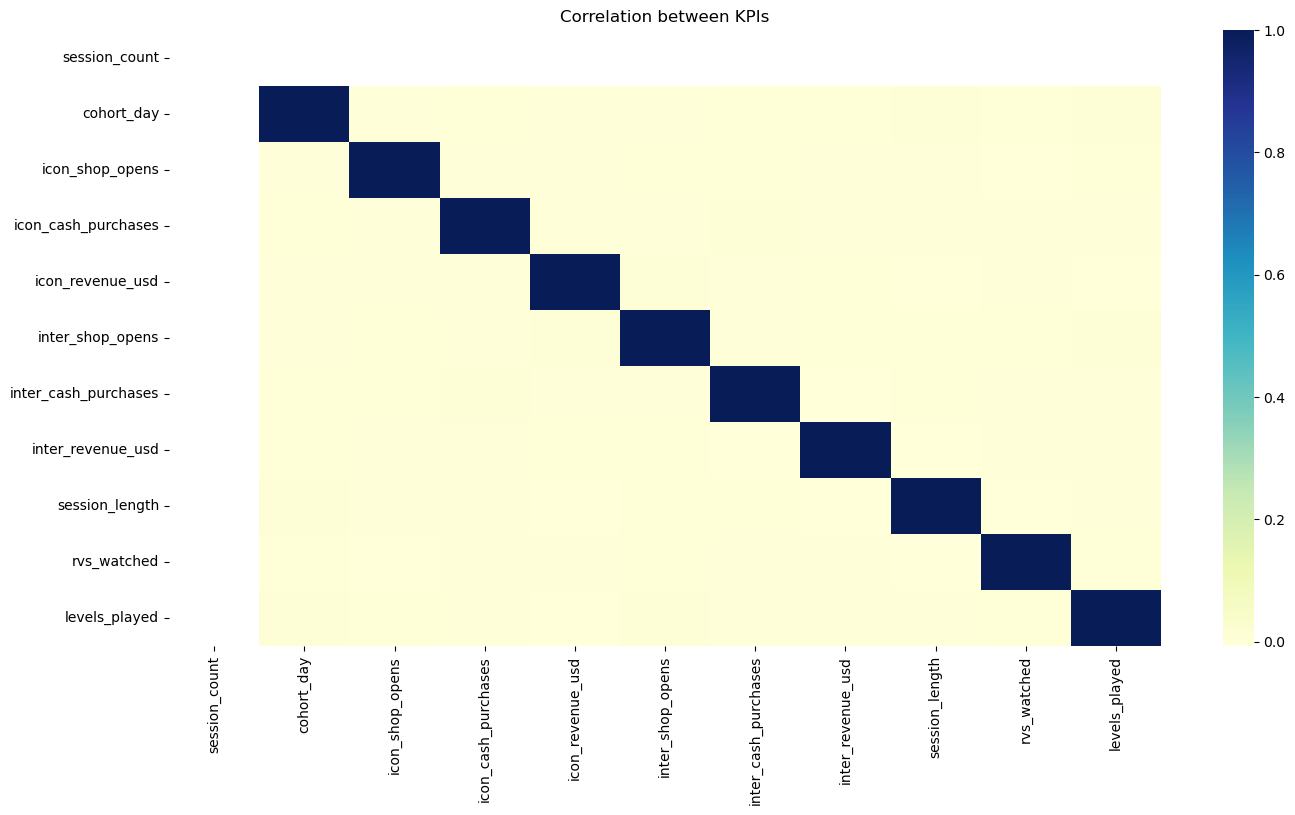

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = new_df[[
    "session_count",	
    "cohort_day",	
    "icon_shop_opens",	
    "icon_cash_purchases",	
    "icon_revenue_usd",	
    "inter_shop_opens",	"inter_cash_purchases",
    "inter_revenue_usd",	"session_length",	"rvs_watched",	"levels_played"
]].corr()

# Create a heatmap to visualize the correlation matrix
# This line creates a heatmap using seaborn to visualize the correlation matrix, with a color map of YlGnBu
plt.figure(figsize=(16,8))
sns.heatmap(corr, cmap="YlGnBu")

# Set the title of the heatmap
# This line sets the title of the heatmap to "Correlation between KPIs"
plt.title('Correlation between KPIs')

# Display the heatmap
# This line displays the heatmap
plt.show()

In [8]:
# Descriptive statistics
df_android_nonus_control.describe()

,DAU,session_count,cohort_day,icon_shop_opens,icon_cash_purchases,icon_revenue_usd,inter_shop_opens,inter_cash_purchases,inter_revenue_usd,session_length,rvs_watched,levels_played
count,6212.0,6212.0,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000,6212.000000
mean,1.0,1.0,15.492756,0.419028,0.181101,1.227624,0.338538,0.575499,1.403091,33.046201,14.719575,13.928847
std,0.0,0.0,8.725207,0.518887,0.385133,1.023641,0.479671,0.596721,1.130416,14.676283,5.715431,8.059197
min,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.0,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000,11.000000,8.000000
50%,1.0,1.0,16.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,33.000000,15.000000,13.000000
75%,1.0,1.0,23.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000,43.000000,19.000000,19.000000
max,1.0,1.0,30.000000,2.000000,1.000000,6.000000,2.000000,3.000000,7.000000,84.000000,37.000000,47.000000


/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


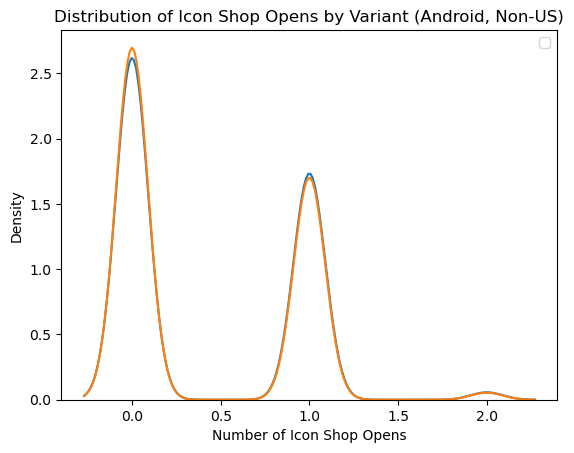

In [9]:
# Plot the distribution of 'icon_shop_opens' for each variant
sns.kdeplot(df_android_nonus_control['icon_shop_opens'])
sns.kdeplot(df_android_nonus_newshopicon['icon_shop_opens'])

plt.xlabel('Number of Icon Shop Opens')
plt.ylabel('Density')
plt.title('Distribution of Icon Shop Opens by Variant (Android, Non-US)')
plt.legend()
plt.show()

In [10]:
import math
# Calculate CTR and standard error

control_ctr = sum(df_android_nonus_control['icon_shop_opens']) / len(df_android_nonus_control)
variant_ctr = sum(df_android_nonus_newshopicon['icon_shop_opens']) / len(df_android_nonus_newshopicon)

print("control_ctr: ", control_ctr)
print("variant_ctr: ", variant_ctr)

control_size = len(df_android_nonus_control)
variant_size = len(df_android_nonus_newshopicon)

print(control_ctr * (1 - control_ctr) / control_size)
print(variant_ctr * (1 - variant_ctr) / variant_size)

control_se = math.sqrt(abs(control_ctr * (1 - control_ctr) / control_size))
variant_se = math.sqrt(abs(variant_ctr * (1 - variant_ctr) / variant_size))

print("control_se: ", control_se)
print("variant_se: ", variant_se)


import statsmodels.api as sm

# Perform two-sample z-test
z_stat, p_value = sm.stats.proportions_ztest([control_ctr * control_size, variant_ctr * variant_size], [control_size, variant_size])

print("z_stat:", z_stat)
print("p_value", p_value)
# Set the significance level (alpha) and make a decision based on the p-value
alpha = 0.05

if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference in shop button CTR between the groups.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in shop button CTR between the groups.")

control_ctr:  0.4190276883451384
variant_ctr:  0.40651310563939635
3.918922806588344e-05
3.8325687145799736e-05
control_se:  0.006260130035860552
variant_se:  0.006190774357525861
z_stat: 1.4213519782597688
p_value 0.15521445967029004
Result: Fail to reject the null hypothesis. There is no significant difference in shop button CTR between the groups.


control_clicks:  2603
control_views:  6212
variant_clicks:  2559
variant_views:  6295


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [control_rate, variant_rate]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


Probability of variant rate < control rate: -0.012
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
delta -0.012  0.009   -0.03    0.003        0.0      0.0    8483.0    6050.0   

       r_hat  
delta    1.0  


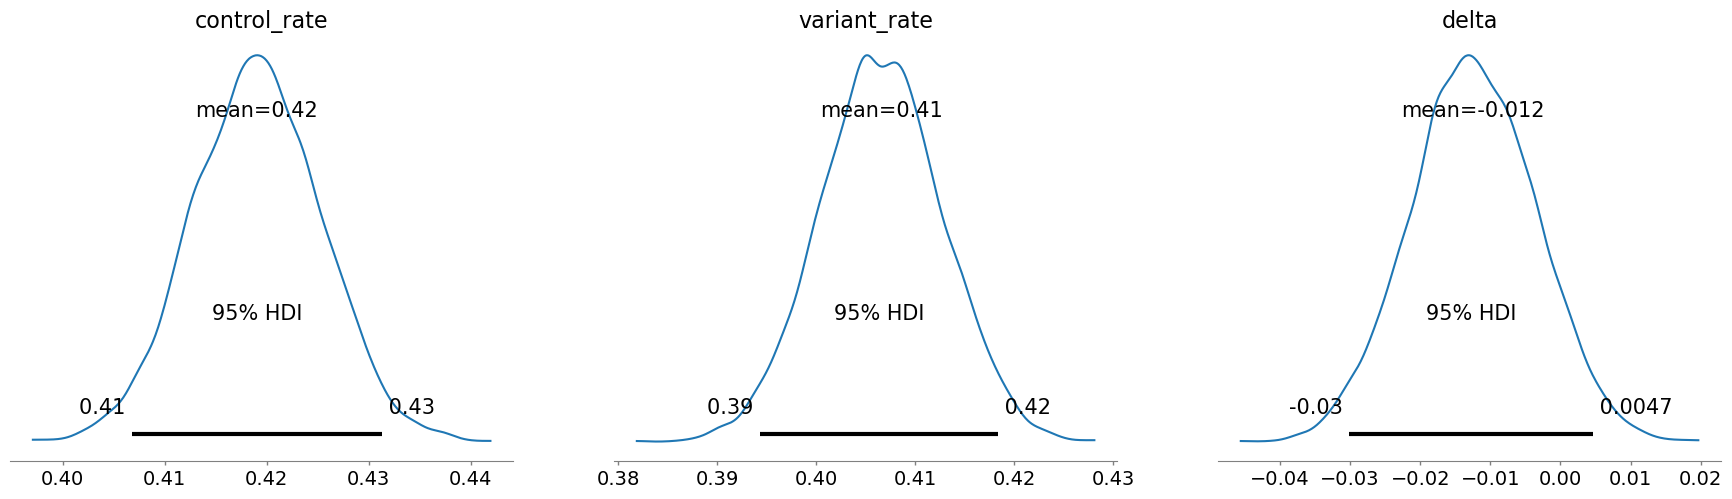

In [33]:
import pymc as pm

# Extract observed data

control_clicks = df_android_nonus_control['icon_shop_opens'].sum()
control_views = len(df_android_nonus_control)
variant_clicks = df_android_nonus_newshopicon['icon_shop_opens'].sum()
variant_views = len(df_android_nonus_newshopicon)

print("control_clicks: " , control_clicks)
print("control_views: " , control_views)
print("variant_clicks: " , variant_clicks)
print("variant_views: " , variant_views)

# Define the model
with pm.Model() as model:
    # Prior distributions for the proportions
    control_rate = pm.Beta('control_rate', alpha=1, beta=1)
    variant_rate = pm.Beta('variant_rate', alpha=1, beta=1)

    # Likelihoods
    control_successes = pm.Binomial('control_successes', n=control_views, p=control_rate, observed=control_clicks)
    variant_successes = pm.Binomial('variant_successes', n=variant_views, p=variant_rate, observed=variant_clicks)

    # Difference in proportions
    delta = pm.Deterministic('delta', variant_rate - control_rate)

    # Sampling
    trace = pm.sample(2000, tune=1000)

# Summarize the posterior distribution
summary = pm.summary(trace, hdi_prob=0.95)

# Plot the posterior distribution
pm.plot_posterior(trace, hdi_prob=0.95)

#print(summary)

# Make a decision based on the posterior distribution
prob_delta_positive = (summary['mean']['delta'] > 0)
prob_delta_negative = (summary['mean']['delta'] < 0)
if prob_delta_positive:
    print("Probability of variant rate > control rate:", summary['mean']['delta'])
if prob_delta_negative:
    print("Probability of variant rate < control rate:", summary['mean']['delta'])
# Print the summary of the posterior distribution
print(pm.summary(trace, var_names=['delta']))


In [34]:
# Descriptive statistics
df_android_us_control.describe()

,DAU,session_count,cohort_day,icon_shop_opens,icon_cash_purchases,icon_revenue_usd,inter_shop_opens,inter_cash_purchases,inter_revenue_usd,session_length,rvs_watched,levels_played
count,6304.0,6304.0,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000
mean,1.0,1.0,15.503648,0.411802,0.180996,1.234772,0.338515,0.573287,1.416244,32.601523,14.807741,13.862944
std,0.0,0.0,8.717815,0.520706,0.385046,1.019914,0.478908,0.592156,1.127996,14.797695,5.820971,7.996822
min,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.0,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,22.000000,11.000000,8.000000
50%,1.0,1.0,16.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,32.000000,15.000000,13.000000
75%,1.0,1.0,23.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000,43.000000,19.000000,19.000000
max,1.0,1.0,30.000000,2.000000,1.000000,6.000000,2.000000,3.000000,7.000000,87.000000,37.000000,44.000000


In [35]:
# Descriptive statistics
df_android_us_newshopicon.describe()

,DAU,session_count,cohort_day,icon_shop_opens,icon_cash_purchases,icon_revenue_usd,inter_shop_opens,inter_cash_purchases,inter_revenue_usd,session_length,rvs_watched,levels_played
count,6235.0,6235.0,6235.000000,6235.000000,6235.000000,6235.000000,6235.000000,6235.000000,6235.000000,6235.000000,6235.000000,6235.000000
mean,1.0,1.0,15.470730,0.415237,0.179952,1.226784,0.337129,0.556696,1.442823,32.912590,14.680192,14.006576
std,0.0,0.0,8.747385,0.511019,0.384178,1.006023,0.482174,0.585175,1.144400,14.775615,5.738923,7.921988
min,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.0,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,23.000000,11.000000,8.000000
50%,1.0,1.0,16.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,33.000000,15.000000,14.000000
75%,1.0,1.0,23.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000,43.000000,19.000000,20.000000
max,1.0,1.0,30.000000,2.000000,1.000000,6.000000,2.000000,3.000000,7.000000,89.000000,36.000000,49.000000


In [36]:
import numpy as np
# Calculate CTR and standard error

control_ctr = sum(df_android_us_control['icon_shop_opens']) / len(df_android_us_control)
variant_ctr = sum(df_android_us_newshopicon['icon_shop_opens']) / len(df_android_us_newshopicon)

print("control_ctr: ", control_ctr)
print("variant_ctr: ", variant_ctr)

import math

control_size = len(df_android_us_control)
variant_size = len(df_android_us_newshopicon)

control_se = math.sqrt(control_ctr * (1 - control_ctr) / control_size)
variant_se = math.sqrt(variant_ctr * (1 - variant_ctr) / variant_size)

print("control_se: ", control_se)
print("variant_se: ", variant_se)


import statsmodels.api as sm

# Perform two-sample z-test
z_stat, p_value = sm.stats.proportions_ztest([control_ctr * control_size, variant_ctr * variant_size], [control_size, variant_size])

print("z_stat:", z_stat)
print("p_value", p_value)
# Set the significance level (alpha) and make a decision based on the p-value
alpha = 0.05

if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference in shop button CTR between the groups.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in shop button CTR between the groups.")

control_ctr:  0.4118020304568528
variant_ctr:  0.4152365677626303
control_se:  0.006198661204219281
variant_se:  0.0062405040683682035
z_stat: -0.39047193735931357
p_value 0.696187602440753
Result: Fail to reject the null hypothesis. There is no significant difference in shop button CTR between the groups.


control_clicks:  2596
control_views:  6304
variant_clicks:  2589
variant_views:  6235


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [control_rate, variant_rate]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


Probability of variant rate < control rate: -0.012
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
delta  0.004  0.009  -0.013     0.02        0.0      0.0    8362.0    5905.0   

       r_hat  
delta    1.0  


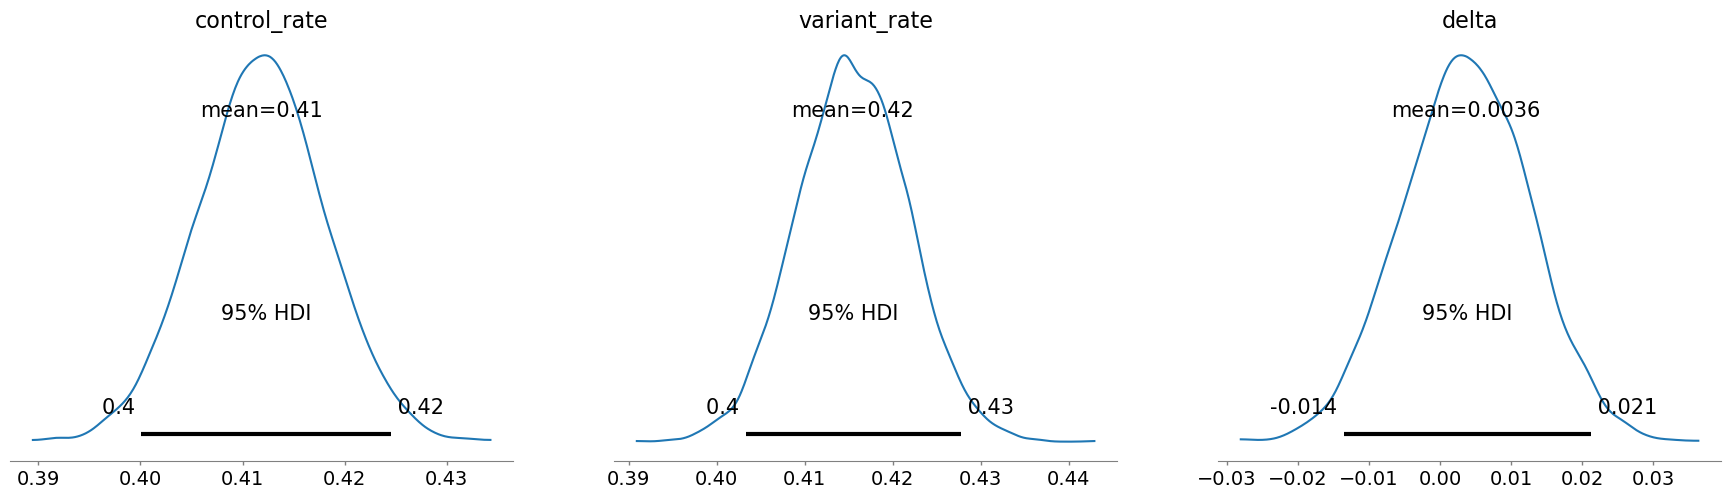

In [38]:
# Observed data

control_clicks = df_android_us_control['icon_shop_opens'].sum()
control_views = len(df_android_us_control)
variant_clicks = df_android_us_newshopicon['icon_shop_opens'].sum()
variant_views = len(df_android_us_newshopicon)

print("control_clicks: " , control_clicks)
print("control_views: " , control_views)
print("variant_clicks: " , variant_clicks)
print("variant_views: " , variant_views)

# Define the model
with pm.Model() as model:
    # Prior distributions for the proportions
    control_rate = pm.Beta('control_rate', alpha=1, beta=1)
    variant_rate = pm.Beta('variant_rate', alpha=1, beta=1)

    # Likelihoods
    control_successes = pm.Binomial('control_successes', n=control_views, p=control_rate, observed=control_clicks)
    variant_successes = pm.Binomial('variant_successes', n=variant_views, p=variant_rate, observed=variant_clicks)

    # Difference in proportions
    delta = pm.Deterministic('delta', variant_rate - control_rate)

    # Sampling
    trace = pm.sample(2000, tune=1000)

# Summarize the posterior distribution
pm.summary(trace, hdi_prob=0.95)

# Plot the posterior distribution
pm.plot_posterior(trace, hdi_prob=0.95)

# Make a decision based on the posterior distribution
prob_delta_positive = (summary['mean']['delta'] > 0)
prob_delta_negative = (summary['mean']['delta'] < 0)
if prob_delta_positive:
    print("Probability of variant rate > control rate:", summary['mean']['delta'])
if prob_delta_negative:
    print("Probability of variant rate < control rate:", summary['mean']['delta'])
# Print the summary of the posterior distribution
print(pm.summary(trace, var_names=['delta']))



/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/pymc_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


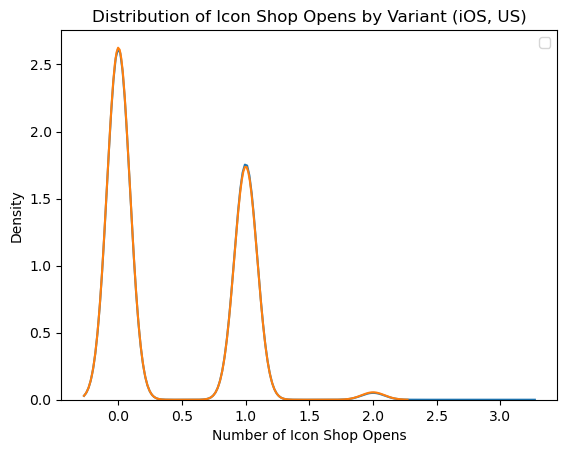

In [39]:
# Plot the distribution of 'icon_shop_opens' for each variant
sns.kdeplot(df_ios_us_control["icon_shop_opens"])
sns.kdeplot(df_ios_us_newshopicon["icon_shop_opens"])

plt.xlabel('Number of Icon Shop Opens')
plt.ylabel('Density')
plt.title('Distribution of Icon Shop Opens by Variant (iOS, US)')
plt.legend()
plt.show()

In [40]:
df_ios_us_control.describe()

,DAU,session_count,cohort_day,icon_shop_opens,icon_cash_purchases,icon_revenue_usd,inter_shop_opens,inter_cash_purchases,inter_revenue_usd,session_length,rvs_watched,levels_played
count,6251.0,6251.0,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000,6251.000000
mean,1.0,1.0,15.743241,0.420573,0.174852,1.211486,0.345225,0.559590,1.413694,32.862582,14.707407,13.816189
std,0.0,0.0,8.643174,0.517427,0.379871,1.010063,0.485140,0.587953,1.137168,14.500168,5.771597,8.044375
min,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.0,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,23.000000,11.000000,8.000000
50%,1.0,1.0,16.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,33.000000,15.000000,13.000000
75%,1.0,1.0,23.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000,43.000000,19.000000,19.000000
max,1.0,1.0,30.000000,3.000000,1.000000,6.000000,2.000000,3.000000,7.000000,88.000000,37.000000,43.000000


In [41]:
df_ios_us_newshopicon.describe()

,DAU,session_count,cohort_day,icon_shop_opens,icon_cash_purchases,icon_revenue_usd,inter_shop_opens,inter_cash_purchases,inter_revenue_usd,session_length,rvs_watched,levels_played
count,6238.0,6238.0,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000,6238.000000
mean,1.0,1.0,15.328952,0.418564,0.174896,1.240943,0.340975,0.563642,1.393716,33.116223,14.730683,13.842738
std,0.0,0.0,8.703063,0.518092,0.379908,1.032335,0.482456,0.594485,1.138552,14.734466,5.799183,7.942946
min,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.0,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,23.000000,11.000000,8.000000
50%,1.0,1.0,15.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,33.000000,15.000000,13.000000
75%,1.0,1.0,23.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000,43.000000,19.000000,19.000000
max,1.0,1.0,30.000000,2.000000,1.000000,6.000000,2.000000,3.000000,7.000000,88.000000,38.000000,46.000000


In [42]:
import numpy as np
# Calculate CTR and standard error

control_ctr = sum(df_ios_us_control['icon_shop_opens']) / len(df_ios_us_control)
variant_ctr = sum(df_ios_us_newshopicon['icon_shop_opens']) / len(df_ios_us_newshopicon)

print("control_ctr: ", control_ctr)
print("variant_ctr: ", variant_ctr)

import math

control_size = len(df_ios_us_control)
variant_size = len(df_ios_us_newshopicon)

control_se = math.sqrt(control_ctr * (1 - control_ctr) / control_size)
variant_se = math.sqrt(variant_ctr * (1 - variant_ctr) / variant_size)

print("control_se: ", control_se)
print("variant_se: ", variant_se)


import statsmodels.api as sm

# Perform two-sample z-test
z_stat, p_value = sm.stats.proportions_ztest([control_ctr * control_size, variant_ctr * variant_size], [control_size, variant_size])

print("z_stat:", z_stat)
print("p_value", p_value)
# Set the significance level (alpha) and make a decision based on the p-value
alpha = 0.05

if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference in shop button CTR between the groups.")
else:
    print("Result: Fail to reject the null hypothesis. There is no significant difference in shop button CTR between the groups.")

control_ctr:  0.42057270836666133
variant_ctr:  0.41856364219301057
control_se:  0.0062437465800262845
variant_se:  0.006246103236993743
z_stat: 0.2274839788025687
p_value 0.82004742576559
Result: Fail to reject the null hypothesis. There is no significant difference in shop button CTR between the groups.


control_clicks:  2629
control_views:  6251
variant_clicks:  2611
variant_views:  6238


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [control_rate, variant_rate]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


Probability of variant rate < control rate: -0.012
        mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
delta -0.002  0.009  -0.019    0.014        0.0      0.0    7747.0    5900.0   

       r_hat  
delta    1.0  


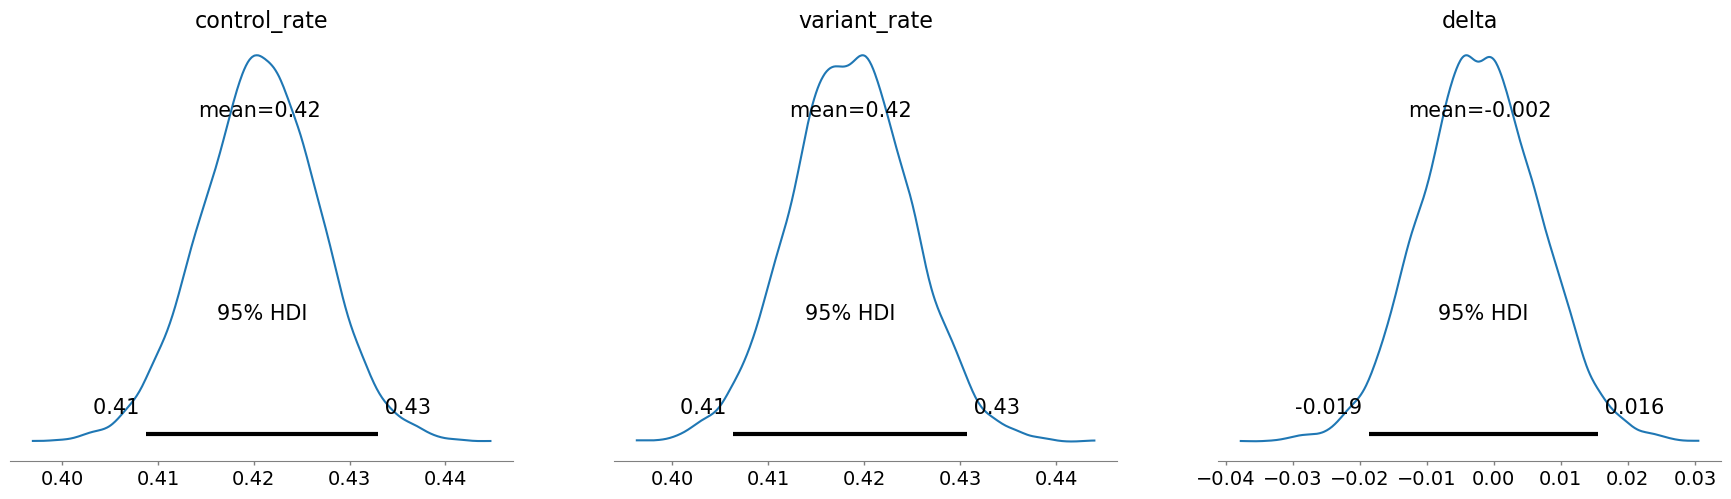

In [43]:
# Observed data

control_clicks = df_ios_us_control['icon_shop_opens'].sum()
control_views = len(df_ios_us_control)
variant_clicks = df_ios_us_newshopicon['icon_shop_opens'].sum()
variant_views = len(df_ios_us_newshopicon)

print("control_clicks: " , control_clicks)
print("control_views: " , control_views)
print("variant_clicks: " , variant_clicks)
print("variant_views: " , variant_views)

# Define the model
with pm.Model() as model:
    # Prior distributions for the proportions
    control_rate = pm.Beta('control_rate', alpha=1, beta=1)
    variant_rate = pm.Beta('variant_rate', alpha=1, beta=1)

    # Likelihoods
    control_successes = pm.Binomial('control_successes', n=control_views, p=control_rate, observed=control_clicks)
    variant_successes = pm.Binomial('variant_successes', n=variant_views, p=variant_rate, observed=variant_clicks)

    # Difference in proportions
    delta = pm.Deterministic('delta', variant_rate - control_rate)

    # Sampling
    trace = pm.sample(2000, tune=1000)

# Summarize the posterior distribution
pm.summary(trace, hdi_prob=0.95)

# Plot the posterior distribution
pm.plot_posterior(trace, hdi_prob=0.95)

# Make a decision based on the posterior distribution
prob_delta_positive = (summary['mean']['delta'] > 0)
prob_delta_negative = (summary['mean']['delta'] < 0)
if prob_delta_positive:
    print("Probability of variant rate > control rate:", summary['mean']['delta'])
if prob_delta_negative:
    print("Probability of variant rate < control rate:", summary['mean']['delta'])
# Print the summary of the posterior distribution
print(pm.summary(trace, var_names=['delta']))